# Cox Model Without cognitive Variables

In [ ]:
import pandas as pd

df= pd.read_csv("/data/df_mock_cox_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20622 entries, 0 to 20621
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NACCID        20622 non-null  object 
 1   start_date    20622 non-null  object 
 2   event         20622 non-null  int64  
 3   event_date    5020 non-null   object 
 4   last_date     20622 non-null  object 
 5   time          20622 non-null  int64  
 6   NACCAGE       20622 non-null  int64  
 7   SEX           20622 non-null  int64  
 8   EDUC          20622 non-null  int64  
 9   HYPERTEN      20622 non-null  int64  
 10  DIABETES      20622 non-null  int64  
 11  HYPERCHO      20622 non-null  int64  
 12  CVHATT        20622 non-null  int64  
 13  STROKE        20622 non-null  int64  
 14  TOBAC30       20622 non-null  int64  
 15  ALCOHOL       20622 non-null  int64  
 16  NACCBMI       20622 non-null  float64
 17  NACCFAM       20622 non-null  int64  
 18  NACCALZD      20622 non-nu

In [2]:
df=df.drop(columns=["HYPERTEN","DIABETES","HYPERCHO","CVHATT","ALCOHOL","event_date",'COGMODE','DEPD','MEMORY','ORIENT'])

In [3]:
df['SEX'] = df['SEX'].apply(lambda x: 0 if x == 1 else 1)
print(df['SEX'].value_counts())

df['start_date']= pd.to_datetime(df['start_date'])
df['last_date']= pd.to_datetime(df['last_date'])
df['NACCID']=df['NACCID'].astype(str)
df['time'] = (df['last_date'] - df['start_date']).dt.days

SEX
1    12322
0     8300
Name: count, dtype: int64


In [4]:
cols_to_drop = ['start_date', 'last_date','NACCID','NACCALZD','VISITYR','VISITMO','VISITDAY','BPDIAS'] 
df_for_cox = df.drop(columns=cols_to_drop)

In [5]:
df_for_cox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20622 entries, 0 to 20621
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   event         20622 non-null  int64  
 1   time          20622 non-null  int64  
 2   NACCAGE       20622 non-null  int64  
 3   SEX           20622 non-null  int64  
 4   EDUC          20622 non-null  int64  
 5   STROKE        20622 non-null  int64  
 6   TOBAC30       20622 non-null  int64  
 7   NACCBMI       20622 non-null  float64
 8   NACCFAM       20622 non-null  int64  
 9   BPSYS         20622 non-null  float64
 10  HYPERTEN_BIN  20622 non-null  int64  
 11  DIABETES_BIN  20622 non-null  int64  
 12  HYPERCHO_BIN  20622 non-null  int64  
 13  CVHATT_BIN    20622 non-null  int64  
 14  ALCOHOL_BIN   20622 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 2.4 MB


In [6]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.1)  # Penalizer is a regularization term to prevent overfitting
cph.fit(df_for_cox, duration_col='time', event_col='event')
cph.print_summary()

c_index = cph.concordance_index_
print(f"C-index: {c_index:.4f}")

<lifelines.CoxPHFitter: fitted with 20622 total observations, 15602 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 20622
number of events observed = 5020
   partial log-likelihood = -45242.35
         time fit was run = 2025-08-01 06:34:16 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
NACCAGE       0.04      1.04      0.00            0.04            0.04                1.04                1.04
SEX          -0.20      0.82      0.02           -0.25           -0.15                0.78                0.86
EDUC         -0.03      0.97      0.00           -0.04           -0.03                0.96                0.97
STROKE        0.36      1.43      0.08            0.21            0.51                1.24                1.66
TOBAC30       0.06      1.07      0.06           -0.05            0.18                0.95                1.20
NACCBMI      -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
NACCFAM       0.12      1.13      0.02            0.07            0.17                1.07                1.18
BPSYS         0.00      1.00      0.00            0.00            0.00                1.00                1.00
HYPERTEN_BIN  0.07      1.07      0.03            0.02            0.12                1.02                1.12
DIABETES_BIN  0.07      1.07      0.04           -0.01            0.14                0.99                1.15
HYPERCHO_BIN  0.07      1.08      0.02            0.03            0.12                1.03                1.13
CVHATT_BIN    0.09      1.09      0.06           -0.03            0.20                0.98                1.22
ALCOHOL_BIN   0.03      1.03      0.06           -0.09            0.15                0.91                1.16

              cmp to     z      p  -log2(p)
covariate                                  
NACCAGE         0.00 29.95 <0.005    652.33
SEX             0.00 -8.05 <0.005     50.07
EDUC            0.00 -8.56 <0.005     56.32
STROKE          0.00  4.80 <0.005     19.26
TOBAC30         0.00  1.06   0.29      1.79
NACCBMI         0.00 -2.86 <0.005      7.88
NACCFAM         0.00  4.79 <0.005     19.22
BPSYS           0.00  2.04   0.04      4.59
HYPERTEN_BIN    0.00  2.72   0.01      7.25
DIABETES_BIN    0.00  1.75   0.08      3.64
HYPERCHO_BIN    0.00  3.05 <0.005      8.75
CVHATT_BIN      0.00  1.51   0.13      2.94
ALCOHOL_BIN     0.00  0.49   0.62      0.68
---
Concordance = 0.67
Partial AIC = 90510.71
log-likelihood ratio test = 1258.09 on 13 df
-log2(p) of ll-ratio test = 864.54

C-index: 0.6660


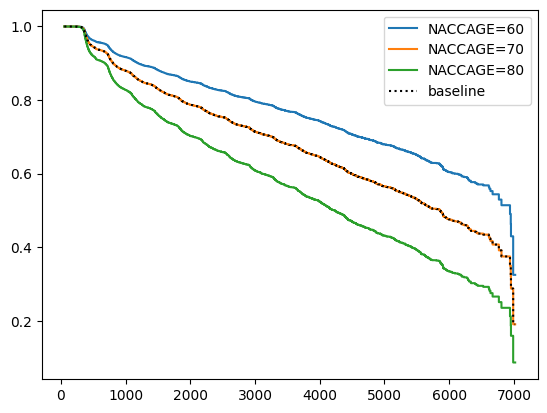

In [7]:
import matplotlib.pyplot as plt
cph.plot_partial_effects_on_outcome(covariates='NACCAGE', values=[60, 70, 80])
plt.show()

In [8]:
import pandas as pd

# 성별별 EDUC 평균, 표준편차, 개수 확인
educ_stats = df_for_cox.groupby('SEX')['EDUC'].agg(['mean', 'std', 'count'])
print(educ_stats)


          mean       std  count
SEX                            
0    16.264217  3.042526   8300
1    15.453498  2.911093  12322


In [ ]:
import pandas as pd

bins = [50, 60, 70, 80, 90, 100]
labels = ['50-59', '60-69', '70-79', '80-89', '90+']
df_for_cox['age_group'] = pd.cut(df_for_cox['NACCAGE'], bins=bins, labels=labels, right=False)

# Convert 'age_group' to a categorical type with ordered categories
df_for_cox['age_group'] = df_for_cox['age_group'].astype(pd.CategoricalDtype(categories=labels, ordered=True))



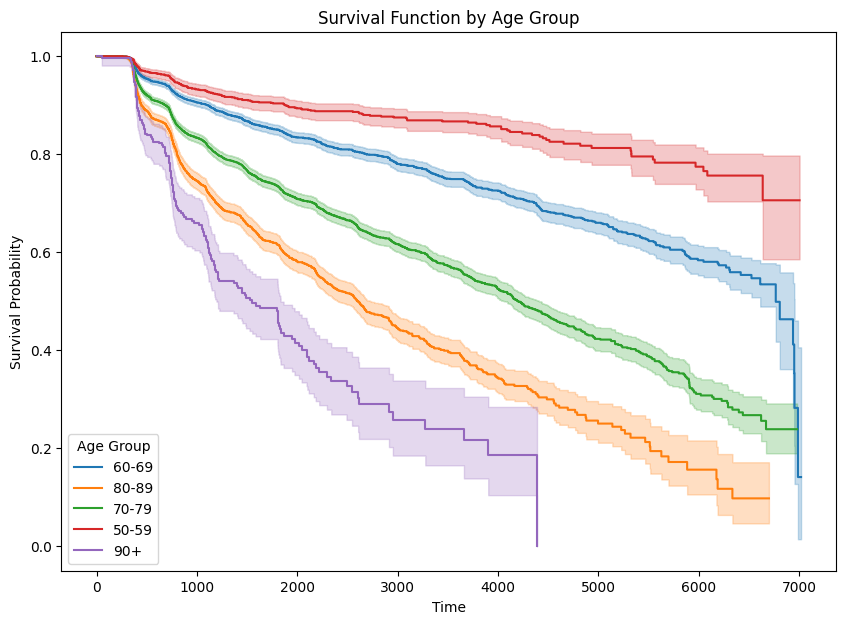

In [10]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(10,7))

for age_group in df_for_cox['age_group'].unique():
    mask = (df_for_cox['age_group'] == age_group)
    if mask.sum() == 0:
        continue
    kmf.fit(durations=df_for_cox.loc[mask, 'time'], 
            event_observed=df_for_cox.loc[mask, 'event'], 
            label=str(age_group))
    kmf.plot_survival_function()

plt.title('Survival Function by Age Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Age Group')
plt.show()
